## Знакомство с библиотеками для анализа данных. Pandas

Результат лабораторной работы − отчет в формате ноутбука Jupyter (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам —  проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.

### О задании

Лабораторные работы "NumPy" и "Pandas" направлены на работу с пакетами NumPy, Pandas и Matplotlib путём решения набора задач (да, алгебры и геометрии тут почти нет). В данных заданиях разрешено пользоваться только стандартной библиотекой языка Python, а также пакетами NumPy, Pandas и Matplotlib. Целью заданий является редактирование данного jupyter notebook-a (в части блоков с кодом на python) таким образом, чтобы были реализованы указанные в заданиях функции.


### Оценивание и штрафы

* Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи)
* «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов
* Если вы нашли решение какого-то из заданий в открытом источнике, необходимо добавить ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник)
* Не оцениваются задания с удалёнными формулировками
* Не оценивается лабораторная работа целиком, если она была выложена в открытый источник

###  Правила сдачи

Работу необходимо сдавать, загрузив в свой приватный репозиторий и сообщив об этом в телеграм @xrzvs (или просто открыв доступ к ноутбуку в Google Colab; более подробную информацию смотрите в README.md). 

### Аналитика данных с [Pandas](https://pandas.pydata.org/) 

Загрузите таблицу с данными из [```articles.csv```](https://disk.yandex.ru/i/m4rxX9t3MGMrnQ). Удалите записи, в которых присутствуют пропуски.

**(0.5 балла) Задача 1.** Проделайте следующие базовые операции с датафреймами:

1. определите количество различных издательств в таблице;
2. найдите количество опубликованных статей в отрезке [2016-06-01, 2016-12-31];
3. посчитайте распределение статей автора *Tom Ciccotta* по годам;
4. найдите месяц, в котором было наибольшее число статей;
5. выпишите 3 первые статьи автора *John Hayward* в 2016 году.

In [3]:
import pandas as pd
import numpy as np

df=pd.read_csv('articles.xls').dropna()

pub=len(df.publication.unique())#количество различных издательств

df['date'] = pd.to_datetime(df['date'], errors='coerce')#преобразовываем данные в дате из строки в типо дататайм
df.groupby('date')
mask = (df['date'] >'2016-06-01') & (df['date'] <= '2016-12-31')
pub_count=len(df.loc[mask])#количество публикаций во временном отрезке

mask_year = (df['year'] >=2012)& (df['author'] =='Tom Ciccotta')
freq_pub=df.loc[mask_year].year.value_counts()#распределение статей автора Tom Ciccotta по годам

#здесь я вас спросила что нужно выводить в 4 задании: самый популярный месяц публикаций или в каком месяце какого года было сделано больше всего публикаций
#вы сказали, что выводи и то и это, поэтому...

mask_year_month=(df['year']>=2012)
pop_month=df.loc[mask_year_month].month.value_counts().idxmax()# здесь сохранен самый популярный месяц публикаций

max_pub_month=max(df.groupby(['year','month']))# а здесь выводится месяц и год, в который было больше всего пубикаций

mask_john =(df['year'] ==2016)&(df['author'] =='John Hayward')
john_pub=df[mask_john].sort_values(by='date').head(3)#здесь сохраняем  3  первые статьи джона в 2016



** Работа со строками в датафрейме. **

Для датафреймов существуют методы работы со строковыми данными. Чтобы применить их, необходимо воспользоваться атрибутом ```str```, после чего вызвать нужные методы работы со строками. Например, вызов:

```df['content'].str.len() ```

подсчитает для каждой строчки в датафрейме количество символов в колонке content. Более подробную информацию про работу с текстовыми данными в Pandas можно найти [здесь](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html).


**(0.5 балла) Задача 2.**

Найдите в датафрейме всех авторов, имя которых содержит Faith. Выведите Series, состоящий из всех таких уникальных имен.

In [ ]:
df1 = df[df['author'].str.contains("Faith")]

ndf=df1['author'].unique()

sdf=pd.DataFrame(ndf)
sdf# пока я делала задачу, я поняла что тут много одного и того же, убрала и только потом прочитала задачу 3, поэтому делю их на две задачи

,0
0,Faith Haleh Robinson
1,Faith Karimi
2,Faith Haleh Robinson
3,"Faith Karimi,"
4,Faith Karimi
5,"Faith Karimi,"
6,Faith Karimi
7,Faith Karimi


**(1 балл) Задача 3. **

Как можно заметить, в таблице существует множество различных написаний имени Faith Karimi. В основном эти написания различаются пунктуацией - лишние пробелы и запятые. Для правильного подсчета статистик для текстовых данных зачастую возникает необходимость в их предобработке.

Проведите следующие преобразования для колонок *author* и *content*:

1. приведение текста к нижнему регистру;

2. удаление всей пунктуации из текста;

3. удаление пробелов в начале и конце строки;

3. замена подряд идущих пробелов одним пробелом.

Например, строка ```"   It's 6 a.m. and I'm still doing this homework :((    "```

преобразуется в строку  ```its 6 am and im still doing this homework```

Подсчитайте статистику для имени Faith из прошлого задания. Проверьте, что теперь различные способы написания «схлопываются» в один.

In [ ]:
df1['author']=df1['author'].str.lower()
df1['author']=df1['author'].str.replace('[^\w\s]','')
df1['author']=df1['author'].str.strip()
ndf=df1['author'].unique()

sdf=pd.DataFrame(ndf)
sdf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,0
0,faith haleh robinson
1,faith karimi


**Группировка данных**

С помощью метода [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) удобно группировать данные по значениям одной или нескольких колонок. Далее можно вычислять различные статистики для каждой группы по отдельности.

**(1 балл) Задача 4.**

Выведите для каждого автора максимальное количество публикаций за календарный год (колонка year), а также сам год, на котором достигается этот максимум. Выведите топ-20 строк в порядке убывания количества публикаций.

Пример:

Василий Пупкин написал 3 статьи в 2016, и 4 в 2017, а его брат Иван Пупкин только 1 статью в 2016, а в 2017 он отправился в армию и статей не писал.

Необходимо вывести

```
Василий Пупкин - 2017 - 4
Иван Пупкин    - 2016 - 1
```

Обратите внимание, что несколько вызовов методов над датафреймами можно объединить в один pipeline. Другими словами, можно писать

```
df.func1().func2().funс3()
```

По возможности реализуйте требуемую функцию с помощью **одного** такого пайплайна. Делайте переносы для лучшей читаемости кода.

In [ ]:
ds = df.copy()
ds.groupby(['author','year'])['title'].count().sort_values().head(30)

author                                                            year
                                                                  2015    1
Linda Tripp                                                       2017    1
Lindsay Crouse                                                    2016    1
Lisa D. Mickey                                                    2017    1
Lisa De Pasquale                                                  2017    1
Lisa Prevost                                                      2016    1
Liu Cixin                                                         2016    1
Liz Robbins and Annie Correal                                     2017    1
Lizette Alvarez and Frances Robles                                2016    1
Lizette Alvarez and Nick Madigan                                  2017    1
Lizette Alvarez and Niraj Chokshi                                 2017    1
Linda Tripp                                                       2016    1
Lizette Alvarez a

**(1 балл) Задача 5.**
Для каждой статьи $i$ исходного датафрейма посчитайте количество статей, опубликованных тем же издательством (publication), к моменту публикации $i$ (включая статьи того же дня).

Обратите внимание, что для всех статей, выпущенных одним издательством в один день, должен получиться одинаковый ответ.

*Hint*. Возможный вариант решения:

1. сгруппировав данные по полям *publication*, *date*, посчитать размер каждой группы;
2. приджойнить размер группы к основному датафрейму с помощью функуии ```pd.merge```.

In [ ]:
nds=df.copy()
grouped=nds.groupby(['publication','date'])['publication'].count().reset_index(name='size of group')
nds=nds.merge(grouped,how='inner',on='date')
nds


,id,title,publication_x,author,date,year,month,content,publication_y,size of group
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016,12,WASHINGTON — Congressional Republicans have...,Atlantic,4
1,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016,12,WASHINGTON — Congressional Republicans have...,Breitbart,25
2,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016,12,WASHINGTON — Congressional Republicans have...,Business Insider,8
3,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016,12,WASHINGTON — Congressional Republicans have...,CNN,15
4,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016,12,WASHINGTON — Congressional Republicans have...,New York Times,4
...,...,...,...,...,...,...,...,...,...,...
150891,64807,White House sees Democrats lining up on Iran,CNN,Deirdre Walsh,2015-08-06,2015,8,Washington (CNN) President Barack Obama is ban...,CNN,18
150892,64808,CNN to host first Democratic presidential debate,CNN,Tom LoBianco,2015-08-06,2015,8,Washington (CNN) CNN and the Democratic Nation...,CNN,18
150893,64812,Malaysia reckless on MH370 facts,CNN,Les Abend,2015-08-06,2015,8,(CNN) It appears that the Malaysian governmen...,CNN,18
150894,64784,"Nevada doctor faces sexual assault, child porn...",CNN,Catherine E. Shoichet,2015-08-07,2015,8,(CNN) Police say their investigation started ...,CNN,1


### [Разреженные матрицы](https://ru.wikipedia.org/wiki/Разреженная_матрица)



Вот здесь http://docs.scipy.org/doc/scipy/reference/sparse.html можно посмотреть, как различные форматы разреженных матриц реализованы в библиотеке `scipy`.

Вот здесь https://www.cise.ufl.edu/research/sparse/matrices/index.html выложено много разреженных матриц из разнообразных приложений. Что особенно приятно, сайт предоставляет удобный клиент для скачивания, в котором доступен предпросмотр и данные о том, являются ли матрицы симметричными или положительно определёнными.

Торговая сеть предоставила вам данные о покупках своих клиентов, представляющие собою 
таблицу со столбцами 
* Номер записи
* *InvoiceNo* - номер чека
* *StockCode* - код товара
* *Description* - название товара

Чтобы понять, какие товары покупают вместе, вы решили построить (разреженную) матрицу, строки и столбцы которой соответствуют различным товарам, а в клетке с "номером" $(g_1, g_2)$ стоит число $c(g_1 \& g_2)$ --- количество чеков, содержащих оба товара. 

**(1 балл) Задача 6.** Ниже приведён код, который вам нужно дополнить, дописав функцию ``CreateMatrix``, создающую из структуры pandas.DataFrame разреженную матрицу. Ваша реализация должна удовлетворять следующим свойствам:
* матрица должна создаваться эффективно и по возможности с минимальным числом циклов;
* итоговая матрица должна позволять быстро отвечать на следующие вопросы:
  - сколько всего было куплено товаров данного типа?
  - какие пары товаров покупались вместе чаще всего?
  - какие товары чаще всего покупались вместе с данным товаром?

Пожалуйста, объясните, почему вы выбрали именно ту, а не иную архитектуру.

Загрузим данные:

In [1]:
import pandas as pd
receipts = pd.read_csv('Online Retail Short.csv', sep=';')

Распечатаем первые несколько строк, чтобы осознать структуру данных:

In [3]:
receipts.head(20)

,Unnamed: 0,InvoiceNo,StockCode,Description
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,1,536365,71053,WHITE METAL LANTERN
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.
5,5,536365,22752,SET 7 BABUSHKA NESTING BOXES
6,6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER
7,7,536366,22633,HAND WARMER UNION JACK
8,8,536366,22632,HAND WARMER RED POLKA DOT
9,21,536368,22960,JAM MAKING SET WITH JARS


А теперь та самая функция. Вам могут пригодиться следующие конструкции:

* ``for name, group in data.groupby('InvoiceNo')`` --- цикл, в котором ``name`` будут различными значениями ``InvoiceNo``, а ``group`` --- кусками нашего ``DataFrame`` с заданным значением ``InvoiceNo``.
* ``for g1, g2 in itertools.combinations(list(group['StockCode']), 2)`` --- цикл, пробегающий пары различных элементов (сочетания по 2) из списка товаров из заданной группы.

In [8]:
import scipy.sparse as sps
import itertools

# Зачем бы нужны следующие две строки?)
# преобразовывает стоковый код в числа, удобные для построения рареженной матрицы
idx2code = sorted(set(receipts['StockCode']))
code2idx = {code : i for i, code in enumerate(idx2code)}

def CreateMatrix(data):
  for name, group in data.groupby('InvoiceNo'):


 #   '''
#    Ввод
#    -----
#    receipts: структура pandas.DataFrame
    
#    Вывод
#    ------
#    res: разреженная матрица
#    '''
 #   # Your code here
#    raise NotImplementedError()

{'10002': 0,
 '10080': 1,
 '10123C': 2,
 '10123G': 3,
 '10125': 4,
 '10133': 5,
 '10134': 6,
 '10135': 7,
 '11001': 8,
 '15030': 9,
 '15034': 10,
 '15036': 11,
 '15039': 12,
 '15044A': 13,
 '15044B': 14,
 '15044C': 15,
 '15044D': 16,
 '15056BL': 17,
 '15056N': 18,
 '15056P': 19,
 '15056n': 20,
 '15058A': 21,
 '15058B': 22,
 '15058C': 23,
 '15060B': 24,
 '16008': 25,
 '16010': 26,
 '16011': 27,
 '16012': 28,
 '16014': 29,
 '16015': 30,
 '16016': 31,
 '16020C': 32,
 '16033': 33,
 '16043': 34,
 '16045': 35,
 '16046': 36,
 '16048': 37,
 '16049': 38,
 '16052': 39,
 '16053': 40,
 '16054': 41,
 '16151A': 42,
 '16156S': 43,
 '16161G': 44,
 '16161P': 45,
 '16161U': 46,
 '16162L': 47,
 '16162M': 48,
 '16168M': 49,
 '16169E': 50,
 '16169K': 51,
 '16169M': 52,
 '16169P': 53,
 '16202B': 54,
 '16207A': 55,
 '16207B': 56,
 '16218': 57,
 '16219': 58,
 '16225': 59,
 '16235': 60,
 '16236': 61,
 '16237': 62,
 '16238': 63,
 '16244B': 64,
 '16248B': 65,
 '16254': 66,
 '16258A': 67,
 '16259': 68,
 '17003': 

**(1 балл) Задача 7.** C помощью созданной вами матрицы ответьте на несколько вопросов:

1) Какая пара товаров была куплена вместе наибольшее число раз? Пожалуйста, в качестве ответа укажите не `id`, а названия из столбца ``Descriptions``.

2) Что чаще всего покупали вместе с ``KNITTED UNION FLAG HOT WATER BOTTLE``?

В вашем ноутбуке должно быть продемонстрировано, как вы это находите с помощью матрицы!

### Визуализация ([Matplotlib](https://matplotlib.org/stable/index.html))

Обратите внимание, что у графиков должны быть подписаны оси, заголовок графика и при необходимости обязательно наличие легенды. За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено.

![](https://imgs.xkcd.com/comics/convincing.png)

In [16]:
# Графическая библиотека
import matplotlib.pyplot as plt
import numpy as np


# Позволяет отрисовывать графики и изображения прямо в ноутбуке, а не в отдельном окне. Жизненно важная вещь!
%matplotlib inline

**(0.5 балла) Задача 8.** Используя функцию ```gen_uncertain_data``` для генерации выборки, отобразите на графике синим цветом функцию ```y(x)```, а также ее доверительный интервал в виде закрашенной зеленым цветом области от ```y[i] - error[i]``` до ```y[i] + error[i]```. Полезной может оказаться функция fill_between.

    def gen_uncertain_data():
        x = np.linspace(0, 30, 100)
        y = np.sin(x/6*np.pi) + np.random.normal(0, 0.02, size=x.shape)
        error = np.random.normal(0.1, 0.02, size=y.shape)
        return x, y, error

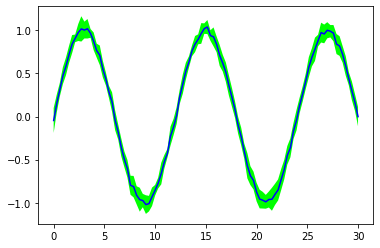

In [23]:
def gen_uncertain_data():
    x = np.linspace(0, 30, 100)
    y = np.sin(x/6*np.pi) + np.random.normal(0, 0.02, size=x.shape)
    error = np.random.normal(0.1, 0.02, size=y.shape)
    return x, y, error


fig, ax = plt.subplots()
x,y,error= gen_uncertain_data()
ax.plot(x,y,color='b')

ax.fill_between(x,y-error,y+error,facecolor='lime')


**(0.5 балла) Задача 9.** Bизуализируйте соотношение различных издательств, используя [pie plot](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-pie).


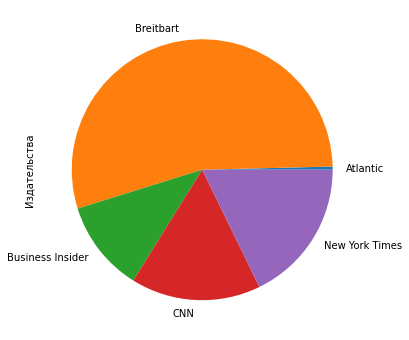

In [51]:
index = df.publication.unique()
value_count = df.groupby(['publication'])['publication'].count().reset_index(name='size of group')
value=value_count['size of group'].values

new_index=sorted(index)
series = pd.Series(value,new_index, name="Издательства")
series.plot.pie(figsize=(6, 6));


**(0.5 балла) Задача 10.** Постройте распределение количества публикаций каждого издания по каждому году, используя [bar plot](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-barplot). В какой год было больше всего публикаций?

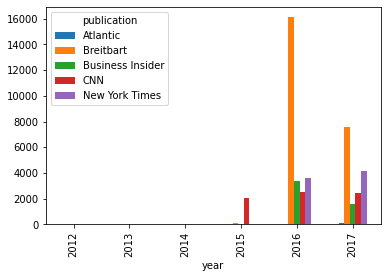

In [70]:
nds=df.groupby(['publication','year'])['year'].count().reset_index(name='size')#.sort_values()
ndf=nds.pivot(index='year',columns='publication',values='size')
ndf.plot.bar()
#на графике из-за масштаба плохо видно с 2012-по 2014 года, но видно, что больше всего публикаций было в 2016

**(0.5 балла) Задача 11.** Изобразите распределение длин заголовков (*title*) статей для каждого издательства. Для этого можно воспользоваться, например, функцией [sns.violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

NameError: ignored

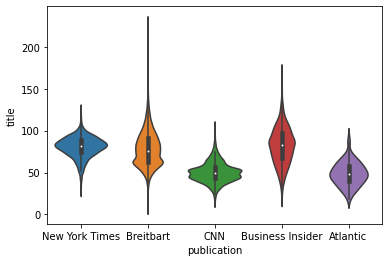

In [10]:
import seaborn as sns
data=df.copy()
data['title']=data['title'].str.len()
ax = sns.violinplot(x='publication',y='title',data=data)